# 라쏘 회귀

- 라쏘 회귀는 특성 선택의 효과를 줌
- 유의미하지 않은 변수는 가중치를 0으로 줌
- 라쏘를 통해 어떤 변수가 유의한 변수인지를 확인해봄
- 해당 데이터는 R에서 한 것과 동일하게 계총인구수, 영역면적, 기초생활총가구수 제외

In [7]:
import pandas as pd
df = pd.read_csv("./변수 종합(1).csv")
df.head(5)

,행정동,계총인구수,평균소득,총가구수,영역둘레(평균상권),기초생활수급 총 가구수,의료기관수,1 의료기관 당 노인인구,1 의료기관 당 기초생활수급권자 수,행정동 면적,상권 개수,중위연령,평균 공시지가
0,동읍,19125,2487.0,10357,4285.776603,676,16,401.31250,57,59.75,44,52,55500000.0
1,북면,43172,2609.4,4358,3633.240311,744,23,395.17390,48,73.70,55,41,72400000.0
2,대산면,6891,1939.9,15100,7840.570505,302,4,835.50000,103,33.80,13,59,45100000.0
3,의창동,49784,3278.2,6011,1178.698679,1263,50,233.82000,34,8.24,74,45,136000000.0
4,팔룡동,25746,2739.3,7314,971.992987,456,63,76.68254,10,14.28,168,43,131000000.0


In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
columns=["계총인구수", "평균소득", "총가구수", "영역둘레", "기초생활수급 총 가구수", "의료기관 수", "1 의료기관 당 노인인구", "1 의료기관 당 기초생활수급권자 수", "행정동 면적", "상권 개수", "중위연령", "평균 공시지가"]
df = sc.fit_transform(df.drop(columns=["행정동"]))
df = pd.DataFrame(df, columns=columns)
df.head(5)

,계총인구수,평균소득,총가구수,영역둘레,기초생활수급 총 가구수,의료기관 수,1 의료기관 당 노인인구,1 의료기관 당 기초생활수급권자 수,행정동 면적,상권 개수,중위연령,평균 공시지가
0,0.046645,-0.501205,0.516094,0.624201,0.219636,-0.275945,-0.083778,-0.247902,2.409607,-0.155498,0.531378,-1.101661
1,1.736190,-0.308436,-0.588919,0.421641,0.396404,-0.033391,-0.097873,-0.366349,3.137911,0.109506,-1.316228,-0.708498
2,-0.812917,-1.362838,1.389752,1.727678,-0.752586,-0.691752,0.913129,0.357495,1.054805,-0.902329,1.707127,-1.343608
3,2.200750,0.744863,-0.284438,-0.340296,1.745556,0.902176,-0.468346,-0.550600,-0.279637,0.567241,-0.644372,0.771099
4,0.511837,-0.103855,-0.044426,-0.404462,-0.352259,1.352634,-0.829138,-0.866460,0.035701,2.831824,-0.980300,0.654779


In [20]:
# 종속변수 지정
y = df["1 의료기관 당 노인인구"]
y.head(5)

0   -0.083778
1   -0.097873
2    0.913129
3   -0.468346
4   -0.829138
Name: 1 의료기관 당 노인인구, dtype: float64

In [21]:
# 독립변수 지정
X = df.drop(columns=['1 의료기관 당 노인인구'])
X.head(5)

,계총인구수,평균소득,총가구수,영역둘레,기초생활수급 총 가구수,의료기관 수,1 의료기관 당 기초생활수급권자 수,행정동 면적,상권 개수,중위연령,평균 공시지가
0,0.046645,-0.501205,0.516094,0.624201,0.219636,-0.275945,-0.247902,2.409607,-0.155498,0.531378,-1.101661
1,1.736190,-0.308436,-0.588919,0.421641,0.396404,-0.033391,-0.366349,3.137911,0.109506,-1.316228,-0.708498
2,-0.812917,-1.362838,1.389752,1.727678,-0.752586,-0.691752,0.357495,1.054805,-0.902329,1.707127,-1.343608
3,2.200750,0.744863,-0.284438,-0.340296,1.745556,0.902176,-0.550600,-0.279637,0.567241,-0.644372,0.771099
4,0.511837,-0.103855,-0.044426,-0.404462,-0.352259,1.352634,-0.866460,0.035701,2.831824,-0.980300,0.654779


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train 데이터 shape :", X_train.shape)
print("X_test 데이터 shape :", X_test.shape)
print("y_train 데이터 shape :", y_train.shape)
print("y_test 데이터 shape :", y_test.shape)

X_train 데이터 shape : (44, 11)
X_test 데이터 shape : (11, 11)
y_train 데이터 shape : (44,)
y_test 데이터 shape : (11,)


In [23]:
from sklearn.linear_model import Lasso
import numpy as np

lasso_clf = Lasso(alpha=0.1)
lasso_clf.fit(X_train, y_train)

print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train.shape[1])

#Used features count: 4 out of 11


### alpha를 0.1로 하니 11개중에 11개 변수 모두 유의하다는 결론이 나옴
### alpha에 대해 그리드 서치를 이용해 최적화 작업 진행

In [24]:
X_train_lasso, X_val_lasso, y_train_lasso, y_val_lasso = train_test_split(X, y, test_size=0.2, random_state=0)

max_score = 0
max_alpha = 0
alphas = [10 ** i for i in range(-1, 6)]
for alpha in alphas: # alpha를 0.1부터 10000까지 10배씩 증가
    lasso_clf = Lasso(alpha=alpha) #라쏘 분류기 선언
    lasso_clf.fit(X_train_lasso, y_train_lasso) #학습
    score = lasso_clf.score(X_val_lasso, y_val_lasso) #검정 데이터셋에 대해 정확도를 측정
    if score > max_score: #정확도가 이전의 정확도 최대값보다 크면 최대값을 변경
        max_score = score
        max_alpha = alpha
print('Max alpha {:.3f} at max validation score {:.3f}'.format(max_alpha, max_score))

Max alpha 0.100 at max validation score 0.843


In [26]:
lasso_clf = Lasso(alpha=0.1)
lasso_clf.fit(X_train, y_train)

print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train.shape[1])

#Used features count: 4 out of 11


In [27]:
# 회귀계수가 0이 아닌 변수들의 컬럼 이름 확인
selected_feature_names = X_train.columns[lasso_clf.coef_ != 0]
print("Selected feature names:", selected_feature_names.tolist())

Selected feature names: ['영역둘레', '1 의료기관 당 기초생활수급권자 수', '행정동 면적', '중위연령']


# 차원축소

- 차원축소를 이용하여 변수를 뽑아 보려고 하였으나 해당 방법은 사용 X
- 어떤식으로 접근해야 효율적으로 뽑을 수 있는지에 대해 판단 불가능

In [9]:
from sklearn.preprocessing import StandardScaler

# 1열을 제외한 데이터 선택
df = df.iloc[:, 1:]

# 데이터프레임의 변수들을 스케일링
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5, random_state=7)
pca.fit(scaled_df)
X_pca = pca.transform(scaled_df)

In [11]:
pca_df = pd.DataFrame(X_pca)
pca_df.head(5)

,0,1,2,3,4
0,1.166290,2.194062,-1.207832,-0.141931,-0.279416
1,-0.201551,2.546596,-1.179281,0.037249,-1.702400
2,3.520321,1.219027,-0.651909,0.126438,0.613624
3,-2.658949,1.495535,0.571205,-0.915912,0.317265
4,-2.409826,0.351064,-0.869636,1.019799,-0.428293


In [12]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,'기여율': pca.explained_variance_ratio_},
                      index = np.array([f"pca{num}" for num in range(5)]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca0,4.866565,0.398173,0.398173
pca1,1.866171,0.152687,0.550860
pca2,1.377006,0.112664,0.663524
pca3,0.986528,0.080716,0.744240
pca4,0.814595,0.066649,0.810889


In [13]:
pca = PCA(n_components=5, random_state=7) # 차원을 5로 축소
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('Original tfidf matrix shape:', X_train.shape)
print('PCA Converted matrix shape:', X_train_pca.shape)

Original tfidf matrix shape: (44, 11)
PCA Converted matrix shape: (44, 5)


In [14]:
lasso_clf = Lasso(alpha=1000)
lasso_clf.fit(X_train_pca, y_train)

print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train.shape[1])

#Used features count: 5 out of 11


# 군집화

- 유의하다고 나온 변수들을 토대로 군집분석을 해서 행정동 별 특성을 나누고자 함
- 단 이렇게 하면 데이터의 개수가 너무 축소됨 -> 회귀 성능에 우려될 것이라고 판단
- 잘 나눠졌음에도 불구하고 해당 방법 사용 안하기로 판단

In [68]:
df = pd.read_csv("./변수 종합(1).csv")
df.head(5)

,행정동,계총인구수,평균소득,총가구수,영역둘레(평균상권),기초생활수급 총 가구수,의료기관수,1 의료기관 당 노인인구,1 의료기관 당 기초생활수급권자 수,행정동 면적,상권 개수,중위연령,평균 공시지가
0,동읍,19125,2487.0,10357,4285.776603,676,16,401.31250,57,59.75,44,52,55500000.0
1,북면,43172,2609.4,4358,3633.240311,744,23,395.17390,48,73.70,55,41,72400000.0
2,대산면,6891,1939.9,15100,7840.570505,302,4,835.50000,103,33.80,13,59,45100000.0
3,의창동,49784,3278.2,6011,1178.698679,1263,50,233.82000,34,8.24,74,45,136000000.0
4,팔룡동,25746,2739.3,7314,971.992987,456,63,76.68254,10,14.28,168,43,131000000.0


In [69]:
df = df[["행정동","계총인구수", "기초생활수급 총 가구수","1 의료기관 당 기초생활수급권자 수","행정동 면적", "중위연령"]]
df.head(5)

,행정동,계총인구수,기초생활수급 총 가구수,1 의료기관 당 기초생활수급권자 수,행정동 면적,중위연령
0,동읍,19125,676,57,59.75,52
1,북면,43172,744,48,73.70,41
2,대산면,6891,302,103,33.80,59
3,의창동,49784,1263,34,8.24,45
4,팔룡동,25746,456,10,14.28,43


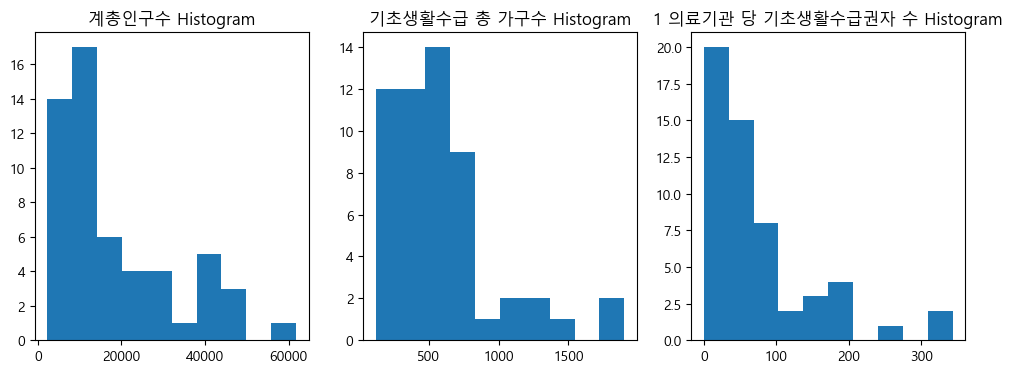

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title("계총인구수 Histogram")
ax1.hist(df["계총인구수"])

ax2.set_title("기초생활수급 총 가구수 Histogram")
ax2.hist(df["기초생활수급 총 가구수"])

ax3.set_title("1 의료기관 당 기초생활수급권자 수 Histogram")
ax3.hist(df["1 의료기관 당 기초생활수급권자 수"])

plt.show()

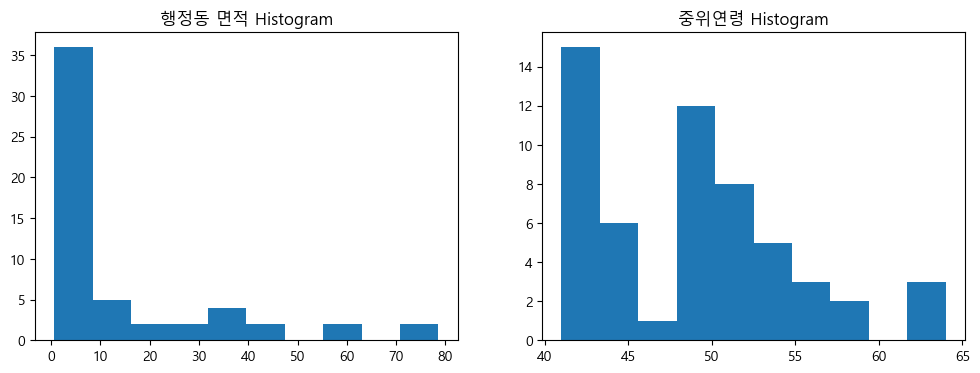

In [71]:
fig, (ax4, ax5) = plt.subplots(figsize=(12,4), nrows=1, ncols=2)

ax4.set_title("행정동 면적 Histogram")
ax4.hist(df["행정동 면적"])

ax5.set_title("중위연령 Histogram")
ax5.hist(df["중위연령"])

plt.show()

In [72]:
df[["계총인구수", "기초생활수급 총 가구수","1 의료기관 당 기초생활수급권자 수","행정동 면적", "중위연령"]].describe()

,계총인구수,기초생활수급 총 가구수,1 의료기관 당 기초생활수급권자 수,행정동 면적,중위연령
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,18461.109091,591.509091,75.836364,13.596182,48.836364
std,14364.006291,388.231502,76.683516,19.330625,6.008524
min,2279.000000,122.000000,0.000000,0.660000,41.000000
25%,8323.000000,346.500000,25.000000,1.815000,43.000000
50%,11930.000000,507.000000,49.000000,4.470000,49.000000
75%,26382.500000,701.500000,91.500000,16.175000,52.000000
max,61805.000000,1899.000000,343.000000,78.580000,64.000000


In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = df[["계총인구수", "기초생활수급 총 가구수","1 의료기관 당 기초생활수급권자 수","행정동 면적", "중위연령"]].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
df["cluster_label"] = labels

print("실루엣 스코어는 : {0:.3f}".format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.296


In [63]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [64]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

C:\Users\sos35\AppData\Local\Temp\ipykernel_15540\3186299039.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\sos35\AppData\Local\Temp\ipykernel_15540\3186299039.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


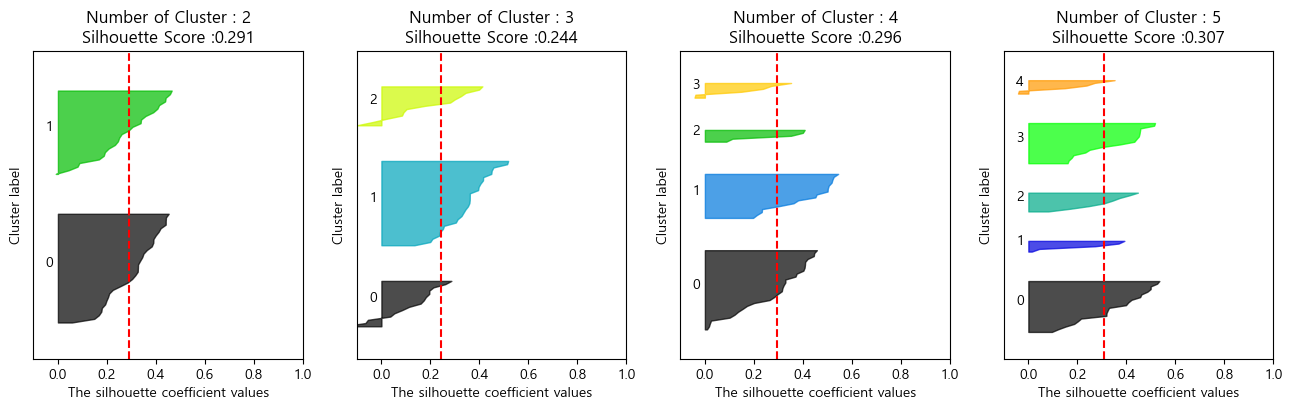

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


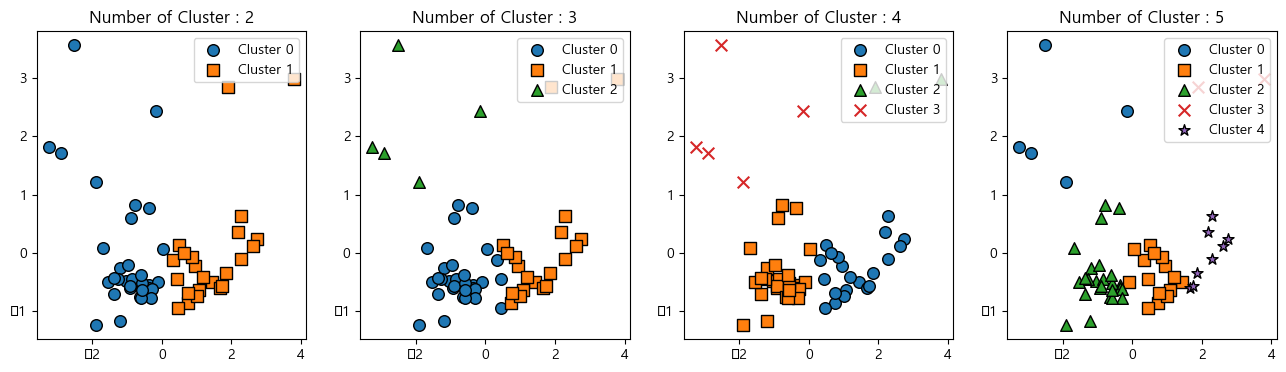

In [74]:
import numpy as np
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

# 변수 별 로그변환 후 표준정규화 version

In [75]:
df = pd.read_csv("./변수 종합(1).csv")
df.head(5)

,행정동,계총인구수,평균소득,총가구수,영역둘레(평균상권),기초생활수급 총 가구수,의료기관수,1 의료기관 당 노인인구,1 의료기관 당 기초생활수급권자 수,행정동 면적,상권 개수,중위연령,평균 공시지가
0,동읍,19125,2487.0,10357,4285.776603,676,16,401.31250,57,59.75,44,52,55500000.0
1,북면,43172,2609.4,4358,3633.240311,744,23,395.17390,48,73.70,55,41,72400000.0
2,대산면,6891,1939.9,15100,7840.570505,302,4,835.50000,103,33.80,13,59,45100000.0
3,의창동,49784,3278.2,6011,1178.698679,1263,50,233.82000,34,8.24,74,45,136000000.0
4,팔룡동,25746,2739.3,7314,971.992987,456,63,76.68254,10,14.28,168,43,131000000.0


In [76]:
df = df[["행정동","계총인구수", "기초생활수급 총 가구수","1 의료기관 당 기초생활수급권자 수","행정동 면적", "중위연령"]]
df.head(5)

,행정동,계총인구수,기초생활수급 총 가구수,1 의료기관 당 기초생활수급권자 수,행정동 면적,중위연령
0,동읍,19125,676,57,59.75,52
1,북면,43172,744,48,73.70,41
2,대산면,6891,302,103,33.80,59
3,의창동,49784,1263,34,8.24,45
4,팔룡동,25746,456,10,14.28,43


In [77]:
df["계총인구수"] = np.log1p(df["계총인구수"])
df["기초생활수급 총 가구수"] = np.log1p(df["기초생활수급 총 가구수"])
df["1 의료기관 당 기초생활수급권자 수"] = np.log1p(df["1 의료기관 당 기초생활수급권자 수"])
df["행정동 면적"] = np.log1p(df["행정동 면적"])
df["중위연령"] = np.log1p(df["중위연령"])


# 로그변환 된 것에 standardascaler 적용
X_features = df[["계총인구수", "기초생활수급 총 가구수","1 의료기관 당 기초생활수급권자 수","행정동 면적", "중위연령"]].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
df["cluster_label(log)"] = labels

print("실루엣 스코어는 : {0:.3f}".format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.292


C:\Users\sos35\AppData\Local\Temp\ipykernel_15540\3186299039.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\sos35\AppData\Local\Temp\ipykernel_15540\3186299039.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


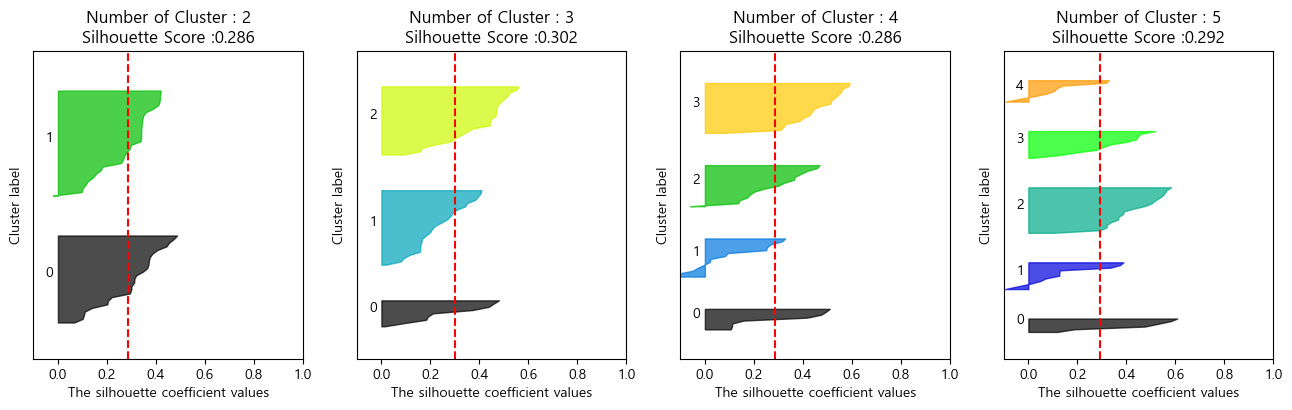

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


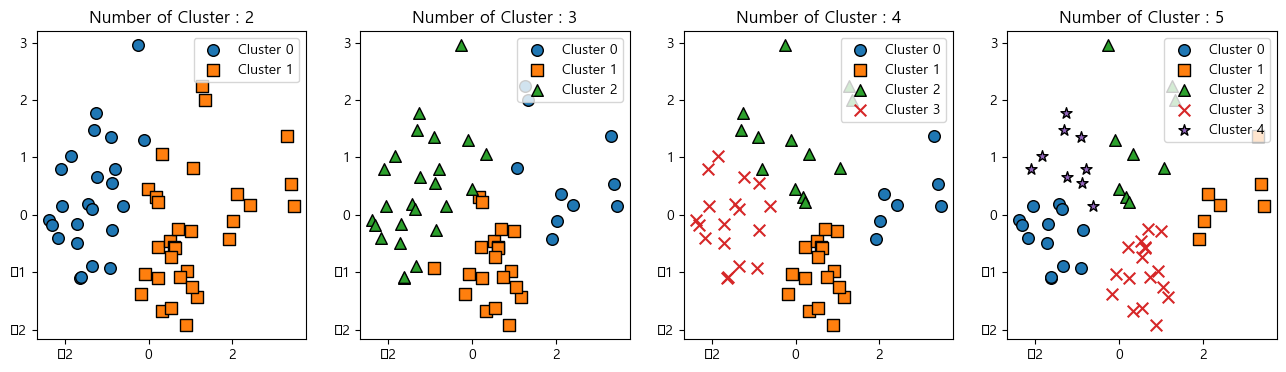

In [78]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

# 표준정규화로만(군집 수 = 4)

In [80]:
df = pd.read_csv("./변수 종합(1).csv")
df.head(5)

,행정동,계총인구수,평균소득,총가구수,영역둘레(평균상권),기초생활수급 총 가구수,의료기관수,1 의료기관 당 노인인구,1 의료기관 당 기초생활수급권자 수,행정동 면적,상권 개수,중위연령,평균 공시지가
0,동읍,19125,2487.0,10357,4285.776603,676,16,401.31250,57,59.75,44,52,55500000.0
1,북면,43172,2609.4,4358,3633.240311,744,23,395.17390,48,73.70,55,41,72400000.0
2,대산면,6891,1939.9,15100,7840.570505,302,4,835.50000,103,33.80,13,59,45100000.0
3,의창동,49784,3278.2,6011,1178.698679,1263,50,233.82000,34,8.24,74,45,136000000.0
4,팔룡동,25746,2739.3,7314,971.992987,456,63,76.68254,10,14.28,168,43,131000000.0


In [81]:
df = df[["행정동","계총인구수", "기초생활수급 총 가구수","1 의료기관 당 기초생활수급권자 수","행정동 면적", "중위연령"]]
df.head(5)

,행정동,계총인구수,기초생활수급 총 가구수,1 의료기관 당 기초생활수급권자 수,행정동 면적,중위연령
0,동읍,19125,676,57,59.75,52
1,북면,43172,744,48,73.70,41
2,대산면,6891,302,103,33.80,59
3,의창동,49784,1263,34,8.24,45
4,팔룡동,25746,456,10,14.28,43


In [82]:
X_features = df[["계총인구수", "기초생활수급 총 가구수","1 의료기관 당 기초생활수급권자 수","행정동 면적", "중위연령"]].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
df["cluster_label"] = labels

In [83]:
df.head(10)

,행정동,계총인구수,기초생활수급 총 가구수,1 의료기관 당 기초생활수급권자 수,행정동 면적,중위연령,cluster_label
0,동읍,19125,676,57,59.75,52,2
1,북면,43172,744,48,73.70,41,3
2,대산면,6891,302,103,33.80,59,2
3,의창동,49784,1263,34,8.24,45,3
4,팔룡동,25746,456,10,14.28,43,1
5,명곡동,40154,1506,58,6.62,49,3
6,봉림동,30137,1899,62,12.18,48,3
7,반송동,39978,507,23,2.30,45,1
8,용지동,27137,603,23,2.65,44,1
9,중앙동,34641,730,13,8.87,41,1


In [84]:
df["cluster_label"].value_counts()

cluster_label
0    28
1    16
3     6
2     5
Name: count, dtype: int64

In [86]:
df.groupby("cluster_label")["행정동"].value_counts()

cluster_label  행정동  
0              가포동      1
               회원2동     1
               경화동      1
               여좌동      1
               교방동      1
               구암1동     1
               구암2동     1
               덕산동      1
               문화동      1
               반월중앙동    1
               병암동      1
               봉암동      1
               산호동      1
               석전동      1
               양덕1동     1
               오동동      1
               회원1동     1
               완월동      1
               웅남동      1
               웅동1동     1
               이동       1
               자산동      1
               진동면      1
               태백동      1
               합성1동     1
               합성2동     1
               합포동      1
               회성동      1
1              팔룡동      1
               사파동      1
               상남동      1
               석동       1
               성주동      1
               양덕2동     1
               용지동      1
               웅천동      1
               월영동      1
               자은

In [93]:
list1 = ["가포동", "회원2동", "경화동", "여좌동", "교방동", "구암1동", "구암2동","덕산동","문화동","반월중앙동","병암동","봉암동","산호동","석전동","양덕1동","오동동","회원1동","완월동","웅남동","웅동1동","이동","자산동","진동면","태백동","합성1동","합성2동","합포동","회성동"]
list2 = ["팔룡동","사파동","상남동","석동","성주동","양덕2동","용지동","웅천동","월영동","자은동","중앙동","충무동","풍호동","가음정동","현동","반송동"]
list3 = ["구산면","대산면","동읍","진북면","진전면"]
list4 = ["내서읍","명곡동","봉림동","북면","웅동2동","의창동"]

print("'0번 군집': ", list1)
print("'1번 군집': ", list2)
print("'2번 군집': ", list3)
print("'3번 군집': ", list4)

'0번 군집':  ['가포동', '회원2동', '경화동', '여좌동', '교방동', '구암1동', '구암2동', '덕산동', '문화동', '반월중앙동', '병암동', '봉암동', '산호동', '석전동', '양덕1동', '오동동', '회원1동', '완월동', '웅남동', '웅동1동', '이동', '자산동', '진동면', '태백동', '합성1동', '합성2동', '합포동', '회성동']
'1번 군집':  ['팔룡동', '사파동', '상남동', '석동', '성주동', '양덕2동', '용지동', '웅천동', '월영동', '자은동', '중앙동', '충무동', '풍호동', '가음정동', '현동', '반송동']
'2번 군집':  ['구산면', '대산면', '동읍', '진북면', '진전면']
'3번 군집':  ['내서읍', '명곡동', '봉림동', '북면', '웅동2동', '의창동']


## 군집 별 요약

- 0번 군집은 
성산구(웅남동) + 
마산합포구(진동면, 가포동, 문화동, 반월중앙동, 완월동, 자산동, 오동동, 교방동, 합포동, 산호동) + 
마산회원구(회원1동,회원2동,석전동,회성동,양덕1동,합성1동,합성2동,구암1동,구암2동,봉암동) + 진해구(여좌동,태백동,경화동,병암동,이동,덕산동,웅동1동) 으로 구성
- 1번 군집은 의창구(팔룡동) + 성산구(반송동, 중앙동, 용지동, 상남동, 사파동, 가음정동, 성주동) + 진해구(석동, 웅천동, 자은동, 충무동, 풍호동) + 마산회원구(양덕2동) + 마산합포구(월영동, 현동) 으로 구성
- 2번 군집은 의창구(대산면, 동읍) + 마산합포구(구산면,진북면,진전면) 으로 구성
- 3번 군집은 의창구(의창동, 명곡동, 봉림동, 북면) + 마산회원구(내서읍) + 진해구(웅동2동) 으로 구성

- 성산구(웅남동)을 제외한 모든 행정동이 1번 군집으로 할당
- 의창구는 0번 군집에 아예 할당 X
- 마산합포구, 마산회원구, 진해구 지역이 0번 군집에 많이 할당됨

In [96]:
df.groupby("cluster_label")["계총인구수"].mean()

cluster_label
0     9457.964286
1    27776.937500
2     7418.800000
3    44835.500000
Name: 계총인구수, dtype: float64

In [97]:
df.groupby("cluster_label")["기초생활수급 총 가구수"].mean()

cluster_label
0     500.357143
1     533.062500
2     307.800000
3    1409.166667
Name: 기초생활수급 총 가구수, dtype: float64

In [98]:
df.groupby("cluster_label")["1 의료기관 당 기초생활수급권자 수"].mean()

cluster_label
0     94.285714
1     34.500000
2    137.200000
3     48.833333
Name: 1 의료기관 당 기초생활수급권자 수, dtype: float64

In [99]:
df.groupby("cluster_label")["행정동 면적"].mean()

cluster_label
0     5.913571
1     9.410625
2    52.468000
3    28.216667
Name: 행정동 면적, dtype: float64

In [100]:
df.groupby("cluster_label")["중위연령"].mean()

cluster_label
0    51.107143
1    42.875000
2    59.800000
3    45.000000
Name: 중위연령, dtype: float64

- 0번 군집은 행정동 면적이 가장 작고 나머지 변수들은 반반한 느낌의 지역들
- 1번 군집은 중위연령이 가장 작음 -> 1의료기관 당 기초생활수급권자 수가 가장 적게 분포한 지역들
- 2번 군집은 인구수나 가구 수는 굉장히 적은 반면 기초생활수급자 수가 많이 분포 -> 중위 연령 수가 가장 높음
- 3번 군집은 젊은층들이 많이 사는 지역들(도심)?(인구수나 가구수가 굉장히 많지만 기초생활수급권자 수는 매우 적음)

# 이상치 데이터 확인

In [16]:
import pandas as pd

df = pd.read_csv("./변수 종합(1).csv")
df.head(5)

,행정동,계총인구수,평균소득,총가구수,영역둘레(평균상권),기초생활수급 총 가구수,의료기관수,1 의료기관 당 노인인구,1 의료기관 당 기초생활수급권자 수,행정동 면적,상권 개수,중위연령,평균 공시지가
0,동읍,19125,2487.0,10357,4285.776603,676,16,401.31250,57,59.75,44,52,55500000.0
1,북면,43172,2609.4,4358,3633.240311,744,23,395.17390,48,73.70,55,41,72400000.0
2,대산면,6891,1939.9,15100,7840.570505,302,4,835.50000,103,33.80,13,59,45100000.0
3,의창동,49784,3278.2,6011,1178.698679,1263,50,233.82000,34,8.24,74,45,136000000.0
4,팔룡동,25746,2739.3,7314,971.992987,456,63,76.68254,10,14.28,168,43,131000000.0


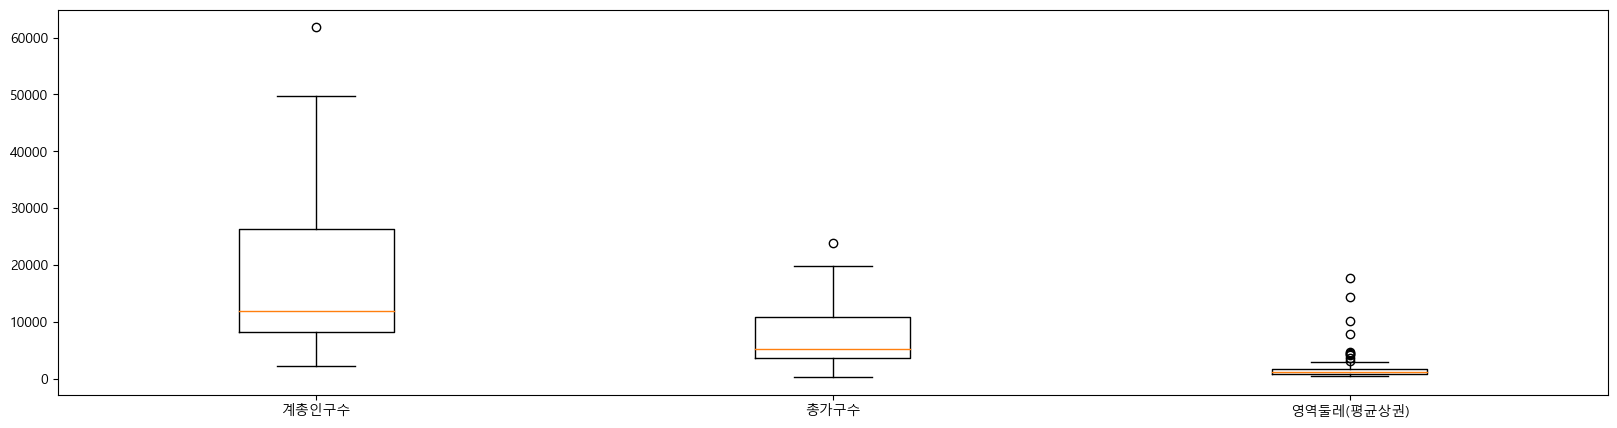

In [17]:
plt.figure(figsize=(20,5))

plt.boxplot(df[["계총인구수", "총가구수", "영역둘레(평균상권)"]].values)
plt.xticks([1,2,3], ["계총인구수", "총가구수", "영역둘레(평균상권)"])
plt.show()

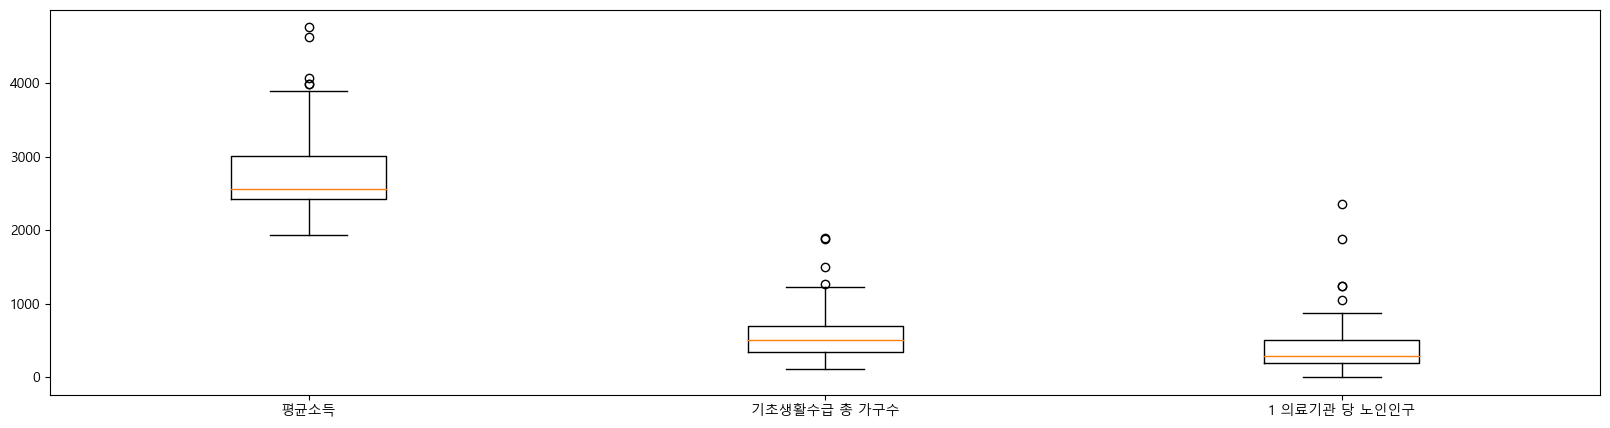

In [18]:
plt.figure(figsize=(20,5))

plt.boxplot(df[["평균소득", "기초생활수급 총 가구수", "1 의료기관 당 노인인구"]].values)
plt.xticks([1,2,3], ["평균소득", "기초생활수급 총 가구수", "1 의료기관 당 노인인구"])
plt.show()

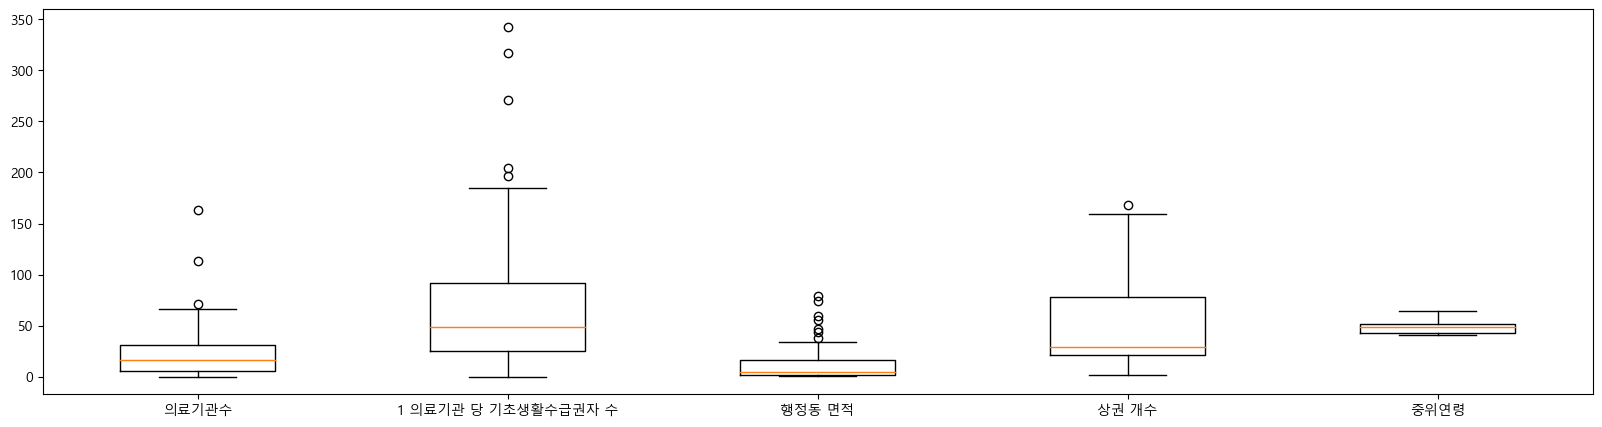

In [19]:
plt.figure(figsize=(20,5))

plt.boxplot(df[["의료기관수", "1 의료기관 당 기초생활수급권자 수", "행정동 면적", "상권 개수", "중위연령"]].values)
plt.xticks([1,2,3,4,5], ["의료기관수", "1 의료기관 당 기초생활수급권자 수", "행정동 면적", "상권 개수", "중위연령"])
plt.show()

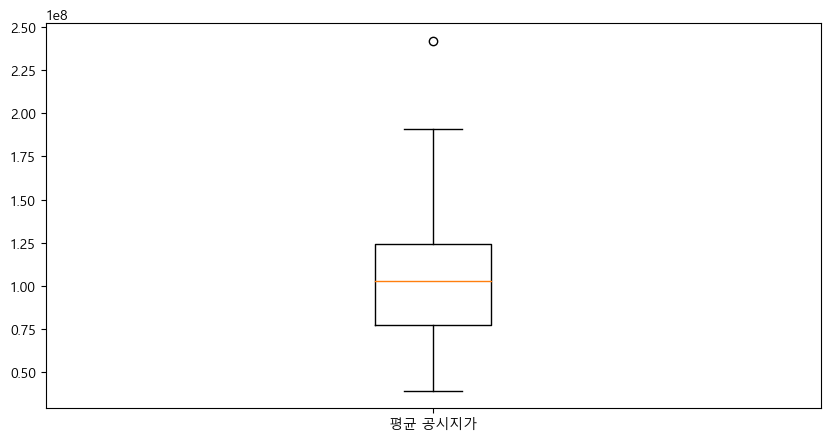

In [20]:
plt.figure(figsize=(10,5))

plt.boxplot(df[["평균 공시지가"]].values)
plt.xticks([1], ["평균 공시지가"])
plt.show()

# 이상치 처리된 데이터로 라쏘

In [22]:
import pandas as pd
df = pd.read_csv("./변수 종합(1) - 이상치 처리 version.csv")
df.head(5)

,행정동,계총인구수,평균소득,총가구수,영역둘레(평균상권),기초생활수급 총 가구수,의료기관수,1 의료기관 당 노인인구,1 의료기관 당 기초생활수급권자 수,행정동 면적,상권 개수,중위연령,평균 공시지가
0,동읍,19125,2487.0,10357,4285.776603,676,16,401.31250,57,59.75,44,52,55500000.0
1,북면,43172,2609.4,4358,3633.240311,744,23,395.17390,48,71.50,55,41,72400000.0
2,대산면,6891,1939.9,15100,7840.570505,302,4,835.50000,103,33.80,13,59,45100000.0
3,의창동,49784,3278.2,6011,1178.698679,1263,50,233.82000,34,8.24,74,45,136000000.0
4,팔룡동,25746,2739.3,7314,971.992987,456,63,76.68254,10,14.28,168,43,131000000.0


In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
columns=["계총인구수", "평균소득", "총가구수", "영역둘레", "기초생활수급 총 가구수", "의료기관 수", "1 의료기관 당 노인인구", "1 의료기관 당 기초생활수급권자 수", "행정동 면적", "상권 개수", "중위연령", "평균 공시지가"]
df = sc.fit_transform(df.drop(columns=["행정동"]))
df = pd.DataFrame(df, columns=columns)
df.head(5)

,계총인구수,평균소득,총가구수,영역둘레,기초생활수급 총 가구수,의료기관 수,1 의료기관 당 노인인구,1 의료기관 당 기초생활수급권자 수,행정동 면적,상권 개수,중위연령,평균 공시지가
0,0.047013,-0.501594,0.516094,0.825182,0.242270,-0.282278,-0.060533,-0.245623,2.489196,-0.155498,0.531378,-1.225665
1,1.738212,-0.308393,-0.588919,0.575485,0.426659,0.000735,-0.076502,-0.368933,3.120596,0.109506,-1.316228,-0.801440
2,-0.813391,-1.365158,1.389752,2.185447,-0.771872,-0.767443,1.068936,0.384627,1.094743,-0.902329,1.707127,-1.486727
3,2.203227,0.747268,-0.284438,-0.363762,1.833984,1.092357,-0.496238,-0.560748,-0.278754,0.567241,-0.644372,0.795051
4,0.512661,-0.103353,-0.044426,-0.442859,-0.354284,1.617952,-0.905006,-0.889574,0.045813,2.831824,-0.980300,0.669540


In [24]:
# 종속변수 지정
y = df["1 의료기관 당 노인인구"]
y.head(5)

0   -0.060533
1   -0.076502
2    1.068936
3   -0.496238
4   -0.905006
Name: 1 의료기관 당 노인인구, dtype: float64

In [25]:
# 독립변수 지정
X = df.drop(columns=['1 의료기관 당 노인인구'])
X.head(5)

,계총인구수,평균소득,총가구수,영역둘레,기초생활수급 총 가구수,의료기관 수,1 의료기관 당 기초생활수급권자 수,행정동 면적,상권 개수,중위연령,평균 공시지가
0,0.047013,-0.501594,0.516094,0.825182,0.242270,-0.282278,-0.245623,2.489196,-0.155498,0.531378,-1.225665
1,1.738212,-0.308393,-0.588919,0.575485,0.426659,0.000735,-0.368933,3.120596,0.109506,-1.316228,-0.801440
2,-0.813391,-1.365158,1.389752,2.185447,-0.771872,-0.767443,0.384627,1.094743,-0.902329,1.707127,-1.486727
3,2.203227,0.747268,-0.284438,-0.363762,1.833984,1.092357,-0.560748,-0.278754,0.567241,-0.644372,0.795051
4,0.512661,-0.103353,-0.044426,-0.442859,-0.354284,1.617952,-0.889574,0.045813,2.831824,-0.980300,0.669540


In [26]:
from sklearn.linear_model import Lasso
import numpy as np

lasso_clf = Lasso(alpha=0.1)
lasso_clf.fit(X, y)

print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X.shape[1])

#Used features count: 3 out of 11


In [28]:
from sklearn.model_selection import train_test_split
X_train_lasso, X_val_lasso, y_train_lasso, y_val_lasso = train_test_split(X, y, test_size=0.2, random_state=0)

max_score = 0
max_alpha = 0
alphas = [10 ** i for i in range(-1, 6)]
for alpha in alphas: # alpha를 0.1부터 10000까지 10배씩 증가
    lasso_clf = Lasso(alpha=alpha) #라쏘 분류기 선언
    lasso_clf.fit(X_train_lasso, y_train_lasso) #학습
    score = lasso_clf.score(X_val_lasso, y_val_lasso) #검정 데이터셋에 대해 정확도를 측정
    if score > max_score: #정확도가 이전의 정확도 최대값보다 크면 최대값을 변경
        max_score = score
        max_alpha = alpha
print('Max alpha {:.3f} at max validation score {:.3f}'.format(max_alpha, max_score))

Max alpha 0.100 at max validation score 0.852


In [30]:
lasso_clf = Lasso(alpha=0.1)
lasso_clf.fit(X, y)

print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X.shape[1])

#Used features count: 3 out of 11


In [32]:
# 회귀계수가 0이 아닌 변수들의 컬럼 이름 확인
selected_feature_names = X.columns[lasso_clf.coef_ != 0]
print("Selected feature names:", selected_feature_names.tolist())

Selected feature names: ['1 의료기관 당 기초생활수급권자 수', '행정동 면적', '중위연령']
